# DESI Trainning

In [1]:
import fitsio
import numpy as np
import healpy as hp
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib inline

from Simulation.simulMap import *

In [2]:
#File names:
DIR = "Data DESI/"
FILE_NGC = DIR + "BGS_ANY_NGC_clustering.dat.fits"
FILE_SGC = DIR + "BGS_ANY_SGC_clustering.dat.fits"

#Reading files:
NGC = Table.read(FILE_NGC)
SGC = Table.read(FILE_SGC)
NGC

TARGETID,Z,NTILE,RA,DEC,PHOTSYS,FRAC_TLOBS_TILES,WEIGHT_ZFAIL,BITWEIGHTS,PROB_OBS,WEIGHT,WEIGHT_COMP,WEIGHT_SYS,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,NX,WEIGHT_FKP
,,,deg,deg,,,,,,,,,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,,
int64,float64,int64,float64,float64,bytes1,float64,float64,int64[2],float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64
39627540901396542,0.11780978798091779,1,159.21336539688306,-10.1570784990642,S,0.986125385405961,1.0,-1 .. -1,1.0,0.4020310943321785,1.0,1.0,49.759033,82.394775,123.07306,107.12112,72.68243,0.013277792318345803,0.010644577467738883
39627540901396881,0.18852438367491672,1,159.31752567050466,-10.126518405884719,S,0.986125385405961,1.0003317594528198,-1 .. -1,1.0,0.40216447194805066,1.0,1.0,4.465552,9.0119915,15.1033325,19.139269,17.25489,0.007570508503506765,0.01852072744982418
39627546827951381,0.13939738520826428,1,157.87076725654435,-9.875451258938376,S,0.98491921005386,1.0000087022781372,-1 .. -1,1.0,0.4020345929185812,1.0,1.0,21.879585,30.944036,39.23734,31.118029,17.95399,0.011543794958537013,0.012223957863869393
39627546832142517,0.13384342727980247,1,157.95311366416092,-9.89176181427952,S,0.98491921005386,1.0,-6502010112314306597 .. -7014319551088676288,0.34375,1.1524891370855783,2.8666666666666667,1.0,64.23985,161.47015,326.29388,286.1153,183.32571,0.011543794958537013,0.012223957863869393
39627546832142599,0.13481237197080895,1,157.95938723949703,-9.900573678838345,S,0.98491921005386,1.0000147819519043,-1158348146330124321 .. -90865853993600030,0.6875,0.5827278403438851,1.449438202247191,1.0,13.473231,20.69669,29.218834,22.669884,17.1243,0.011543794958537013,0.012223957863869393
39627546832144102,0.3277038731563745,1,158.0586254092098,-9.883478054340443,S,0.98491921005386,1.0,-1 .. -1,1.0,0.4020310943321785,1.0,1.0,4.8808885,13.26394,26.47439,35.094788,26.350426,0.0020923038580991644,0.0639135806306668
39627546832144556,0.2804423196541022,1,158.0919034157211,-9.885985138196315,S,0.98491921005386,1.0000360012054443,-1 .. -1,1.0,0.40204556793620055,1.0,1.0,4.8884478,10.819805,16.304056,14.631474,10.874418,0.0033096766342485067,0.041377478709825624
39627546832144612,0.1756295118675194,1,158.09744754077613,-9.948586941938014,S,0.98491921005386,1.0000108480453491,-8354376908713272321 .. -8487356173256100561,0.5390625,0.7408939110042868,1.8428571428571427,1.0,19.048483,29.186644,40.23485,27.274828,21.075787,0.008095592993999081,0.0173402934391804


## Data exoloration

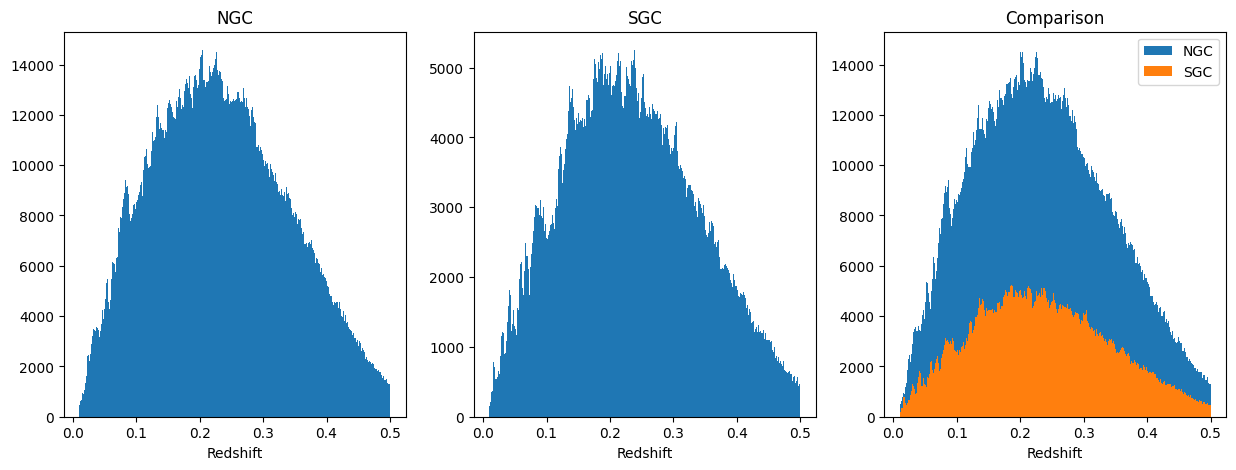

In [3]:
def histCompare_NS(col, xlabel, **kwargs):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    xscale = kwargs.pop('xscale', "linear")
    get_hist(NGC[col], xlabel=xlabel, title="NGC", show=False, figax = (fig, ax[0]), **kwargs)
    get_hist(SGC[col], xlabel=xlabel, title="SGC", show=False, figax = (fig, ax[1]), **kwargs)
    get_hist(NGC[col], xlabel=xlabel, title="Comparison", show=False, figax = (fig, ax[2]), label="NGC", **kwargs)
    get_hist(SGC[col], xlabel=xlabel, title="Comparison", show=False, figax = (fig, ax[2]), label="SGC", **kwargs)
    ax[2].legend()
    ax[0].set_xscale(xscale)
    ax[1].set_xscale(xscale)
    ax[2].set_xscale(xscale)
    return fig, ax

histCompare_NS("Z", "Redshift", bins=500);

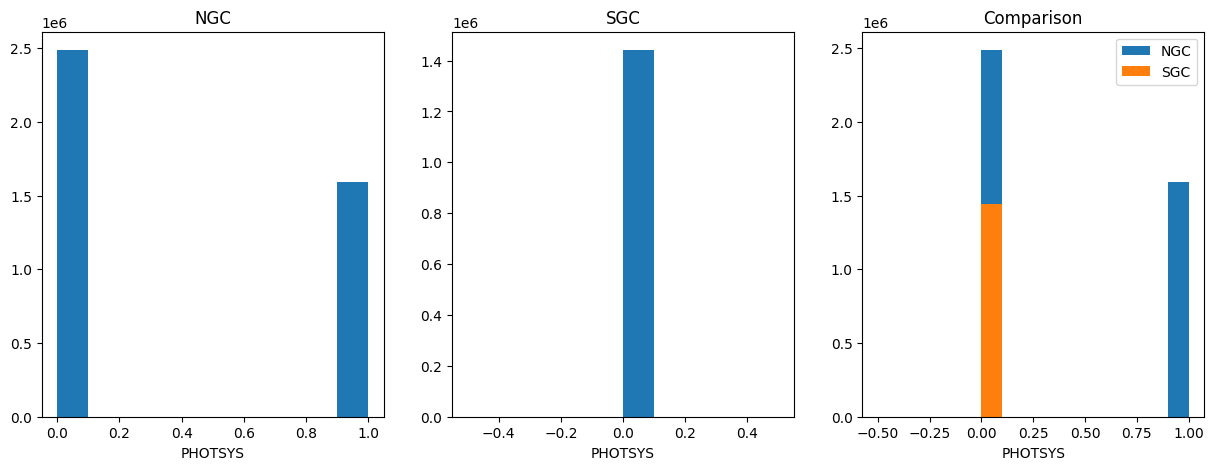

In [4]:
histCompare_NS("PHOTSYS", "PHOTSYS");

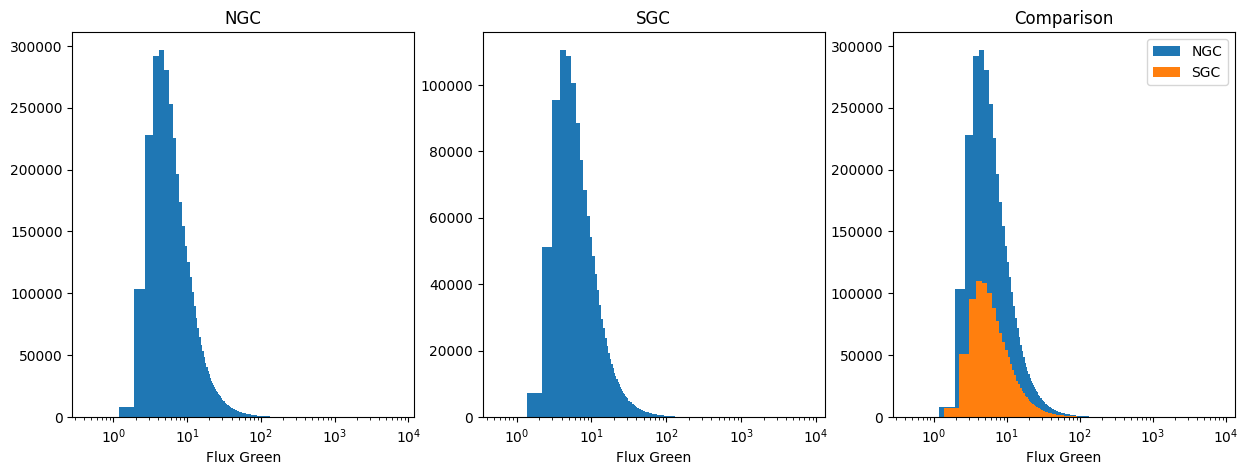

In [5]:
fig, ax = histCompare_NS("flux_g_dered", "Flux Green", bins=10000, xscale="log");

## Maps

Number of pixels = 196608


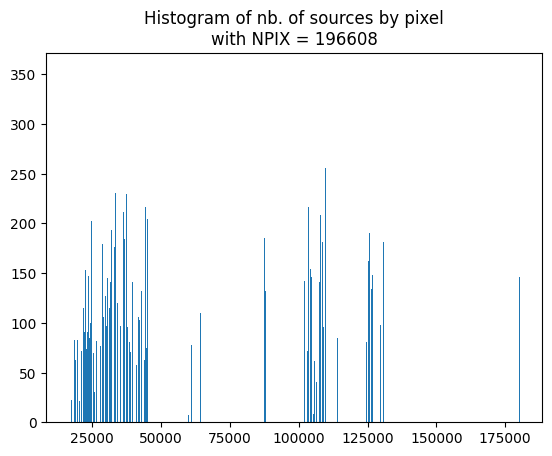

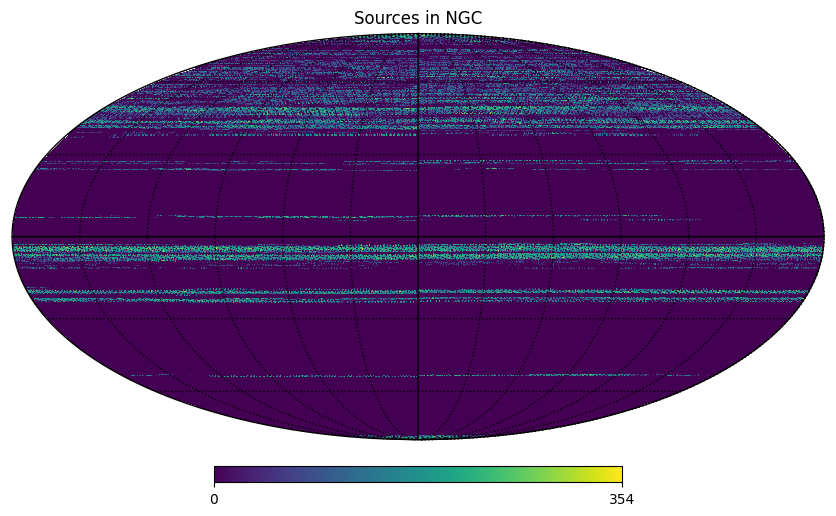

In [6]:
NSIDE = 128
NPIX = hp.nside2npix(NSIDE)
print("Number of pixels = {}".format(NPIX))
NSource_NGC = RADEC2NSource(NSIDE, NGC['RA'], NGC['DEC'], nest=True)
hp.mollview(NSource_NGC, title="Sources in NGC")
hp.graticule()

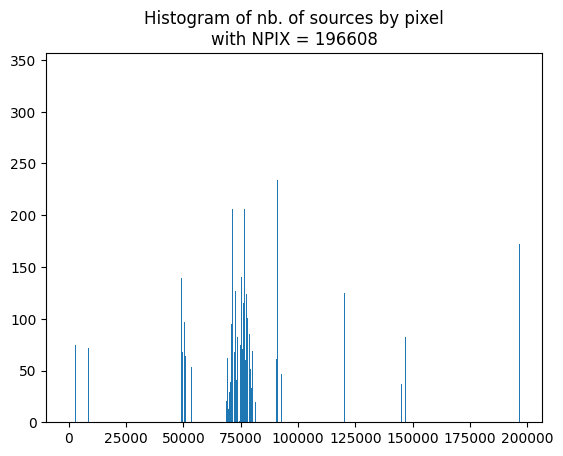

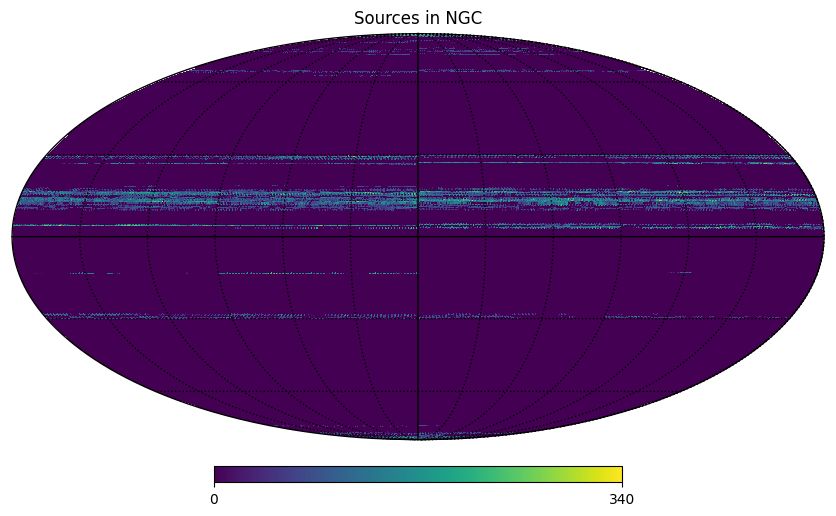

In [7]:
NSource_SGC = RADEC2NSource(NSIDE, SGC['RA'], SGC['DEC'], nest=True)
hp.mollview(NSource_SGC, title="Sources in NGC")
hp.graticule()